In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from model import create_model
from dataset import Dataset
import matplotlib.pyplot as plt
import string

2023-06-21 23:32:37.647714: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-21 23:32:38.113058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
model_name = "final-models/feller-v2"
# load pre trained model
model = tf.keras.models.load_model(model_name)
class_names = string.digits + string.ascii_uppercase + string.ascii_lowercase

2023-06-21 23:33:00.915421: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-21 23:33:00.934716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-21 23:33:00.934876: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Found 1370 files belonging to 62 classes.
Found 128 files belonging to 62 classes.
Found 124 files belonging to 62 classes.
EMNIST Set Size: Train size: 0, Val size: 0, Test size: 58161
Custom Set Size: Train size: 1370, Val size: 128, Test size: 124
Combined Set Size: Train size: 1370, Val size: 128, Test size: 58285


2023-06-21 23:33:02.497296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-06-21 23:33:02.497560: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-06-21 23:33:03.208167: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


1/1 [==============================] - 0s 10ms/step


2023-06-21 23:33:03.717740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


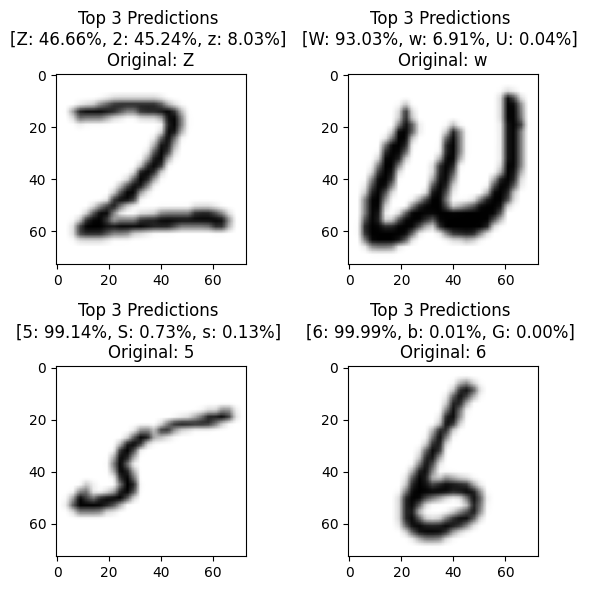

In [4]:
ds = Dataset(0, 0, -1)
ds_train, ds_val, ds_test = ds.get_emnist_sets()

sample_size = 4

# filter by label
#ds_test = ds_test.filter(lambda image, label: label == class_names.index('8'))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,6))

# Iterate over the sample dataset and extract the images and predicted labels
for i, (image, label) in enumerate(ds_test.take(sample_size)):
    # ,ake predictions using the pre trained model
    prediction = model.predict(image[tf.newaxis, ...])
 
    # get top 3 picks
    predicted_labels = np.argsort(-prediction[0])[:3]
    prediction_top = prediction[0][predicted_labels[:3]]
    
    # Convert the predicted label index to its corresponding class name
    predicted_class_name = [class_names[label] for label in predicted_labels]
    
    # Plot the image and predicted label
    axs[i//2, i%2].imshow(image, cmap=plt.cm.gray)
    axs[i//2, i%2].set_title(f'''Top 3 Predictions 
[{predicted_class_name[0]}: {prediction_top[0]*100:.2f}%, {predicted_class_name[1]}: {prediction_top[1]*100:.2f}%, {predicted_class_name[2]}: {prediction_top[2]*100:.2f}%] 
Original: {class_names[label.numpy()]}''')
    #axs[i//2, i%2].set_xlabel("Pixel (px)")
    #axs[i//2, i%2].set_ylabel("Pixel (px)")

# show plot
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 10ms/step
tf.Tensor(
[[[[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]

  [[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]

  [[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]

  ...

  [[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]

  [[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]

  [[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]]], shape=(1, 73, 73, 1), dtype=float32)
5200.276
1/1 [==============================] - 0s 10ms/step


2023-06-21 23:33:04.153392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [124]
	 [[{{node Placeholder/_4}}]]
2023-06-21 23:33:04.153594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [124]
	 [[{{node Placeholder/_4}}]]


tf.Tensor(
[[[[0.99597883]
   [0.99597883]
   [0.99597883]
   ...
   [0.9881365 ]
   [0.9920577 ]
   [0.9920577 ]]

  [[0.99990004]
   [0.99990004]
   [0.99597883]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]

  [[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]

  ...

  [[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]

  [[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]

  [[0.99990004]
   [0.99990004]
   [0.99990004]
   ...
   [0.99990004]
   [0.99990004]
   [0.99990004]]]], shape=(1, 73, 73, 1), dtype=float32)
5234.6094


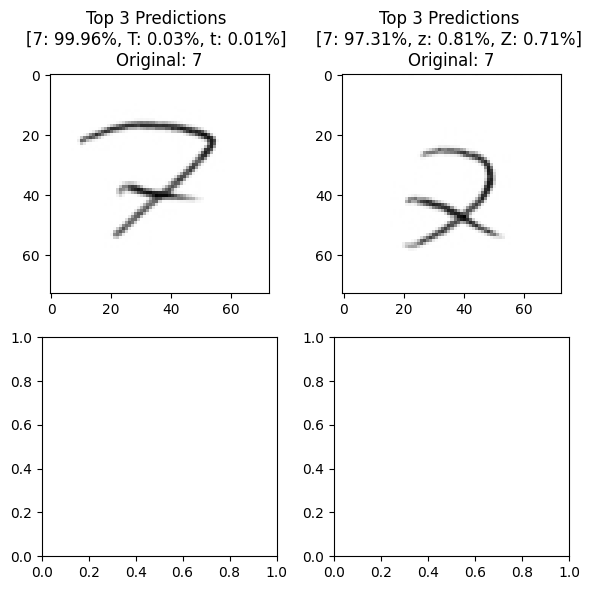

In [5]:
sample_size = 4

# load custom dataset
ds_train, ds_val, ds_test = ds.get_custom_sets()

# filter by label name
ds_test = ds_test.filter(lambda image, label: label == class_names.index('7'))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,6))

# Iterate over the sample dataset and extract the images and predicted labels
for i, (image, label) in enumerate(ds_test.take(sample_size)):
    # Make predictions using the pre trained model
    prediction = model.predict(image[tf.newaxis, ...])
    
    # get top 3 picks
    predicted_labels = np.argsort(-prediction[0])[:3]
    prediction_top = prediction[0][predicted_labels[:3]]
    
    # Convert the predicted label index to its corresponding class name
    predicted_class_name = [class_names[label] for label in predicted_labels]
    
    # Plot the image and predicted label
    axs[i//2, i%2].imshow(image, cmap=plt.cm.gray)
    axs[i//2, i%2].set_title(f'''Top 3 Predictions 
[{predicted_class_name[0]}: {prediction_top[0]*100:.2f}%, {predicted_class_name[1]}: {prediction_top[1]*100:.2f}%, {predicted_class_name[2]}: {prediction_top[2]*100:.2f}%] 
Original: {class_names[label.numpy()]}''')
    #axs[i//2, i%2].set_xlabel("Pixel (px)")
    #axs[i//2, i%2].set_ylabel("Pixel (px)")

# show plot
plt.tight_layout()
plt.show()